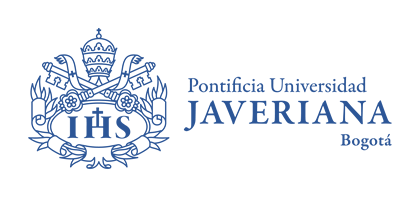

# Tecnologías emergentes - Taller SVM

## Integrantes
- Andrés García Montoya
- Nicolás David Rincón Ballesteros
- Alejandro Enrique Suárez Acosta

# Importando Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score


# Carga de datos

In [2]:
dataset = pd.read_csv('WinnipegDataset.txt')
dataset.head()

,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
0,1,-13.559,-21.407,-11.4040,-15.248,-11.923,-15.291,-2.1548,-7.8474,-10.0020,...,0.18519,0.72602,5.3333,6.000000,0.29489,9.77780,2.44440,1.67700,0.20988,0.65422
1,1,-12.802,-20.335,-10.3990,-14.132,-11.096,-14.361,-2.4039,-7.5330,-9.9369,...,0.33333,-0.48751,2.1111,0.098765,0.83333,0.33333,0.33333,0.84869,0.50617,-0.18898
2,1,-12.431,-19.902,-10.0740,-13.598,-10.829,-14.048,-2.3566,-7.4717,-9.8283,...,0.25926,0.25298,2.2222,0.172840,0.68889,0.88889,0.66667,1.27300,0.30864,0.10483
3,1,-12.689,-19.529,-10.0280,-13.350,-11.056,-14.014,-2.6611,-6.8396,-9.5006,...,0.16049,0.43750,4.1111,0.320990,0.83333,0.33333,0.33333,1.14910,0.38272,0.41603
4,1,-12.686,-19.278,-9.8185,-13.108,-10.932,-13.939,-2.8675,-6.5919,-9.4594,...,0.18519,0.35000,4.0000,0.444440,0.68889,0.88889,0.66667,1.58110,0.20988,0.50000


# Análisis exploratorio de datos
Se realiza un análisis exploratorio de los datos para identificar la relación entre las variables y la variable objetivo, en este caso se elabora un mapa de calor para identificar la correlación entre las variables.

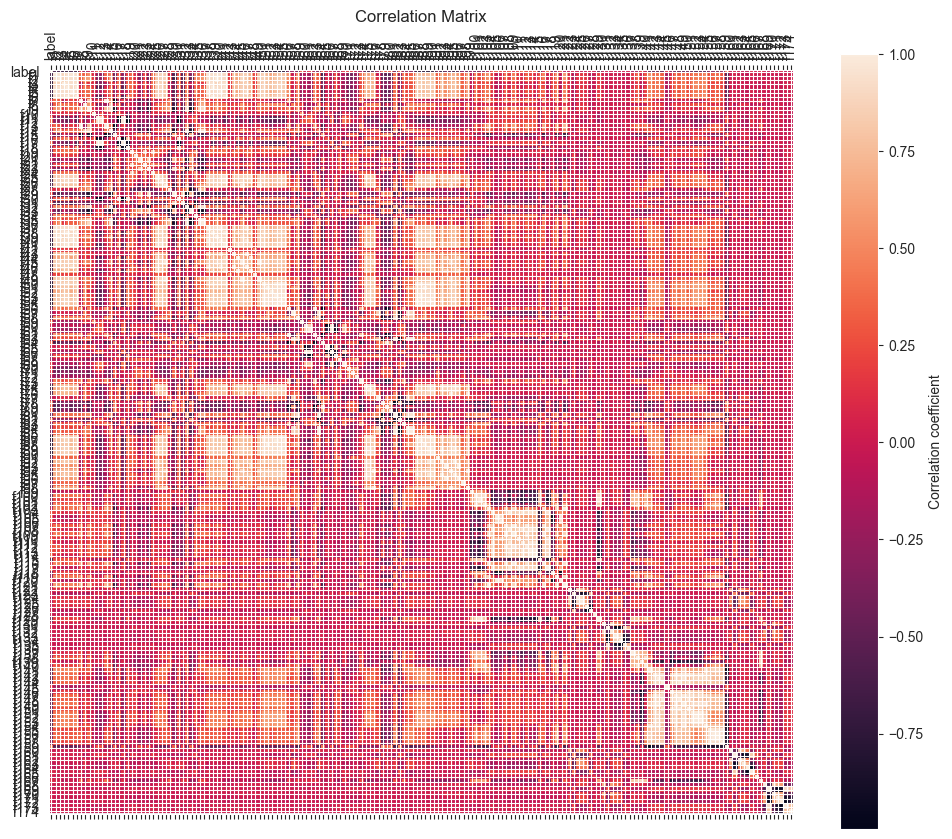

In [3]:
def plot_correlation_matrix(dataset):
    correlation_matrix = dataset.corr()
    plt.figure(figsize=(12, 10))
    plt.matshow(correlation_matrix, fignum=1)
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.colorbar(label='Correlation coefficient')
    plt.title('Correlation Matrix')
    plt.show()

plot_correlation_matrix(dataset)

# Preprocesamiento de datos
Se realiza un preprocesamiento de los datos, eliminando las variables altamente corrleacionadas (>95%) y haciendo un escalado de los datos.

### Eliminación de variables altamente correlacionadas

In [4]:
# Se define el treshold de correlación
correlation_threshold = 0.95
# Se obtiene la matriz triangular superior de la matriz de correlación
# Ya que la matriz de correlación es simétrica, solo se toma la parte superior
correlation_matrix = np.abs(dataset.corr().values)
upper_triangle = np.triu(correlation_matrix, k=1)
# Se obtienen las posiciones de las variables a eliminar
to_drop = np.where(upper_triangle > correlation_threshold)
to_drop = set([dataset.columns[i] for i in to_drop[1]])
# Se eliminan las variables altamente correlacionadas
dataset.drop(to_drop, axis=1, inplace=True)
dataset.head()

,label,f1,f3,f4,f7,f8,f9,f10,f11,f12,...,f162,f163,f164,f166,f167,f168,f169,f170,f172,f174
0,1,-13.559,-11.4040,-15.248,-2.1548,-7.8474,-10.0020,0.04239,3.3253,3.3677,...,2.44440,1.11110,1.8310,0.72602,5.3333,6.000000,0.29489,9.77780,1.67700,0.65422
1,1,-12.802,-10.3990,-14.132,-2.4039,-7.5330,-9.9369,0.22842,3.0360,3.2644,...,1.33330,1.11110,1.2149,-0.48751,2.1111,0.098765,0.83333,0.33333,0.84869,-0.18898
2,1,-12.431,-10.0740,-13.598,-2.3566,-7.4717,-9.8283,0.44978,2.7687,3.2185,...,0.77778,0.77778,1.3689,0.25298,2.2222,0.172840,0.68889,0.88889,1.27300,0.10483
3,1,-12.689,-10.0280,-13.350,-2.6611,-6.8396,-9.5006,0.66378,2.2942,2.9580,...,0.77778,0.77778,1.8892,0.43750,4.1111,0.320990,0.83333,0.33333,1.14910,0.41603
4,1,-12.686,-9.8185,-13.108,-2.8675,-6.5919,-9.4594,0.83143,2.1756,3.0070,...,1.66670,1.00000,1.7351,0.35000,4.0000,0.444440,0.68889,0.88889,1.58110,0.50000


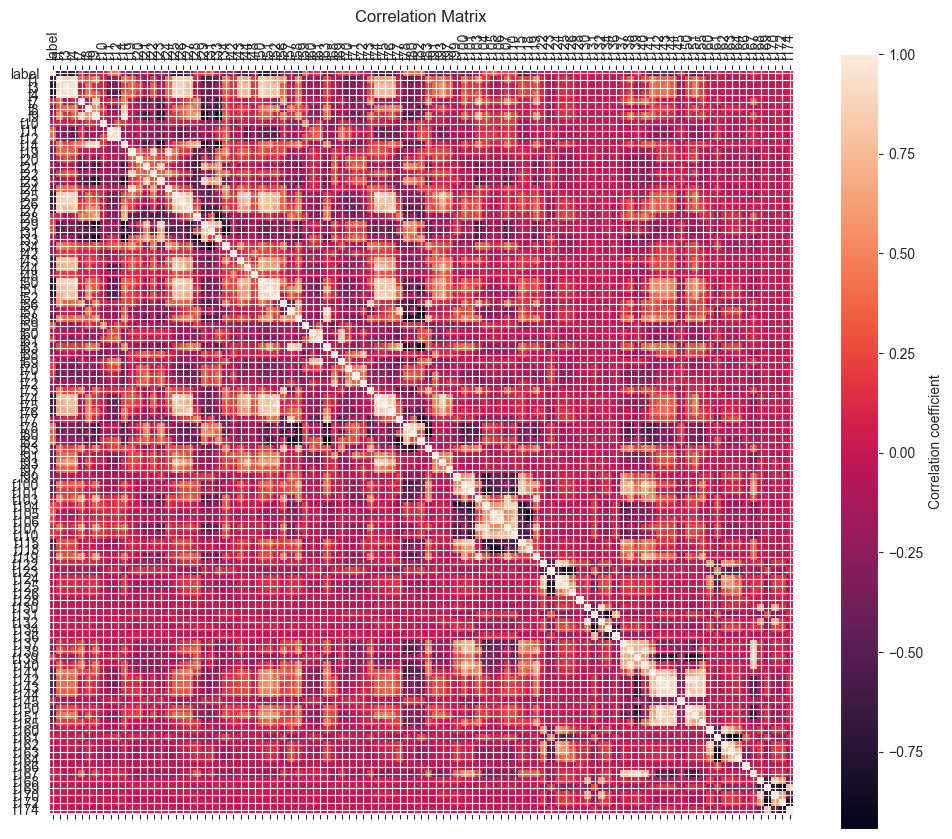

In [5]:
plot_correlation_matrix(dataset)

### Escalado de datos

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset.drop('label', axis=1)) 